In [ ]:
pip install netCDF4

In [2]:
import netCDF4
import xarray as xr
import numpy as np
import pandas as pd


In [4]:
file_path_nc ="D:/Masters/Thesis/Data/NDVI/NDVI_2003_2023.nc"
dataset = xr.open_dataset(file_path_nc)
dataset


C:\Users\Hp\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


<xarray.Dataset>
Dimensions:          (time: 252, lon: 160, lat: 110)
Coordinates:
  * time             (time) datetime64[ns] 2003-01-01 2003-02-01 ... 2023-12-01
  * lon              (lon) float64 76.05 76.15 76.25 76.35 ... 91.75 91.85 91.95
  * lat              (lat) float64 21.05 21.15 21.25 21.35 ... 31.75 31.85 31.95
Data variables:
    NDVI             (time, lon, lat) float32 ...
    EVI              (time, lon, lat) float32 ...
    DetailedQA       (time, lon, lat) float32 ...
    sur_refl_b01     (time, lon, lat) float32 ...
    sur_refl_b02     (time, lon, lat) float32 ...
    sur_refl_b03     (time, lon, lat) float32 ...
    sur_refl_b07     (time, lon, lat) float32 ...
    ViewZenith       (time, lon, lat) float32 ...
    SolarZenith      (time, lon, lat) float32 ...
    RelativeAzimuth  (time, lon, lat) float32 ...
    SummaryQA        (time, lon, lat) float32 ...
Attributes:
    crs:      EPSG:4326

# Regrid using DataFRame

In [ ]:
which = 'NDVI'
var = dataset.metpy.parse_cf(which)
test = var.isel(time=0)
df1 = pd.DataFrame(data=test.values)
df1

## Specially for LST

In [ ]:
# Extract the variable of interest
which = 'SWE_inst'
var = dataset.metpy.parse_cf(which)

# Extract longitude and latitude values
lons = dataset.metpy.parse_cf('X')
lats = dataset.metpy.parse_cf('Y')
var
if lats[0] > lats[-1]:
    lats = lats[::-1]
    var = var[:, ::-1, :]
dataset['y'] = lats
unit = var.units
dataset

## Regridding using dataarray

In [6]:
regrid_lat = np.arange(21.125,32.125,0.25)
regrid_lon = np.arange(76.125,92.125,0.25)
NDVI = dataset['NDVI'].interp(lat = regrid_lat,lon=regrid_lon,method='slinear')
NDVI

<xarray.DataArray 'NDVI' (time: 252, lon: 64, lat: 44)>
array([[[5315.25  , 2856.4375, 2925.875 , ..., 4456.6875, 4374.125 ,
         4830.375 ],
        [3664.625 , 3665.3125, 3572.1875, ..., 4706.75  , 5095.    ,
         4429.125 ],
        [3837.4375, 3772.1875, 3355.9375, ..., 4735.25  , 4786.    ,
         4459.75  ],
        ...,
        [      nan,       nan,       nan, ..., 1194.    , 1100.125 ,
         1096.5   ],
        [      nan,       nan,       nan, ..., 1286.6875, 1487.75  ,
         1464.875 ],
        [      nan,       nan,       nan, ..., 1391.1875, 1741.25  ,
         1666.625 ]],

       [[4534.125 , 2463.4375, 2397.4375, ..., 4571.3125, 5074.5   ,
         4871.5   ],
        [3070.0625, 3152.4375, 2944.0625, ..., 5193.625 , 5349.375 ,
         5025.4375],
        [3241.75  , 3082.375 , 2737.875 , ..., 5110.4375, 5223.6875,
         4720.75  ],
...
        [      nan,       nan,       nan, ..., 1472.5625,  448.875 ,
         1347.1875],
        [      nan,       nan,       nan, ..., 1781.25  , 1241.6875,
         1633.6875],
        [      nan,       nan,       nan, ..., 1981.6875, 1875.9375,
          105.8125]],

       [[6255.3125, 4679.9375, 5255.9375, ..., 6144.375 , 5486.8125,
         6621.375 ],
        [5524.9375, 5557.375 , 5761.75  , ..., 6080.4375, 6730.5   ,
         6078.0625],
        [5624.875 , 5843.125 , 5618.125 , ..., 6327.125 , 6489.9375,
         5755.4375],
        ...,
        [      nan,       nan,       nan, ..., 1390.25  ,  800.875 ,
         1341.375 ],
        [      nan,       nan,       nan, ..., 1524.875 , 1608.25  ,
         1697.    ],
        [      nan,       nan,       nan, ..., 1717.875 , 1706.0625,
          664.6875]]])
Coordinates:
  * time     (time) datetime64[ns] 2003-01-01 2003-02-01 ... 2023-12-01
  * lat      (lat) float64 21.12 21.38 21.62 21.88 ... 31.12 31.38 31.62 31.88
  * lon      (lon) float64 76.12 76.38 76.62 76.88 ... 91.12 91.38 91.62 91.88
Attributes:
    id:             NDVI
    data_type:      {'type': 'PixelType', 'precision': 'int', 'min': -32768, ...
    dimensions:     [43200 18000]
    crs:            EPSG:4326
    crs_transform:  [ 9.26625433e+02  0.00000000e+00 -2.00151094e+07  0.00000...
    bounds:         [-180.  -90.  180.   90.]

# Regridding using xCDAT

In [ ]:
 conda create --clone base --prefix /home/jupyter/newenvironment -y 

In [ ]:
!conda install xcdat
import xcdat as xc
ds = xr.open_dataset(file_path_nc)
ds

## Assess the regridded Product

In [ ]:
for variable in data_array.variables:
    print(variable)
which = 'precipitation'
var = data_array.metpy.parse_cf(which)
values = var.isel(time=0)
lons = data_array.metpy.parse_cf('lon')
lats = data_array.metpy.parse_cf('lat')
data_array
values

## See Regridded Data in DAtaFRAme

In [ ]:
df = pd.DataFrame(data=values.values)
df

## Export Regridded data to CSV File

In [ ]:
what = 'NDVI'
NDVI = data_array['NDVI']
subset = NDVI.isel(time=slice(1,48))
df = subset.to_dataframe()
df
df.to_csv('D:/Masters/Thesis/Data/RFM/'+ what +'.csv')

In [ ]:
# Convert the data to a DataFrame
df = values.to_dataframe().reset_index()

# Pivot the DataFrame
pivot_df = df.pivot(index='y', columns='x', values=which)

# Display the pivoted DataFrame
pivot_df

# Specify the output file path
output_csv_path = "D:/Masters/Thesis/Data/ReGrid/"+"Regrid"+which+".csv"

# Export the pivoted DataFrame to a CSV file
pivot_df.to_csv(output_csv_path)

print(f"Pivoted DataFrame has been exported to {output_csv_path}")

## Save the Regridded data into .nc file

In [ ]:
# Save the regridded data to a NetCDF file
import xarray as xr
NDVI = data_array['NDVI']
output_file = "D:/Masters/Thesis/Data/ReGrid/NDVI.nc"
ds.to_netcdf(output_file)
#NDVI.to_netcdf(output_file)

In [ ]:
dims = data_array.dims
dims

In [ ]:
!pip install h5netcdf
import h5netcdf
import numpy as np

# Assuming you have a DataArray named 'data_array'


# Extract data and dimensions from the DataArray
data = data_array.values  # The actual data as a NumPy array
dims = data_array.dims    # Tuple of dimension names
coords = data_array.coords  # Dictionary of coordinate arrays

# Create a new NetCDF file using h5netcdf
with h5netcdf.File('D:/Masters/Thesis/Data/ReGrid/output_file.nc', 'w') as f:
    # Create dimensions in the NetCDF file
    for dim in dims:
        f.dimensions[dim] = len(coords[dim])

    # Create coordinate variables
    for dim in dims:
        f.create_variable(dim, ('dim',), dtype=coords[dim].dtype)
        f.variables[dim][:] = coords[dim]

    # Create the variable to store the data
    data_var = f.create_variable('data_var', dims, dtype=data.dtype)

    # Assign data to the variable
    f.variables['data_var'][:] = data

    # Optional: Add attributes from the DataArray to the NetCDF file
    for attr_name, attr_value in data_array.attrs.items():
        f.variables['data_var'].attrs[attr_name] = attr_value


## Plot the Data

TypeError: Dimensions of C (160, 110) should be one smaller than X(160) and Y(110) while using shading='flat' see help(pcolormesh)

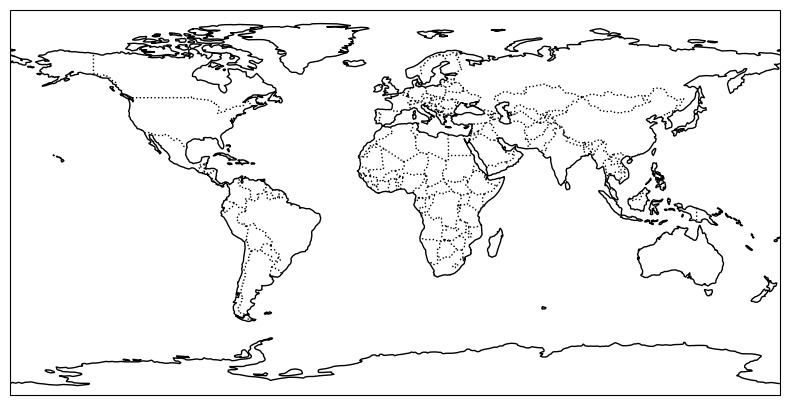

In [15]:
which = 'NDVI'
file_path_nc ="D:/Masters/Thesis/Data/NDVI/NDVI_2003_2023.nc"
data_array = xr.open_dataset(file_path_nc)
var = data_array.metpy.parse_cf(which)
values = var.isel(time=0)
lons = data_array.metpy.parse_cf('lon')
lats = data_array.metpy.parse_cf('lat')
#unit = var.units
# Plot the data
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
fig, ax = plt.subplots(figsize=(10, 5), subplot_kw={'projection': ccrs.PlateCarree()})
# Add coastlines and borders for context
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Plot the data
c = ax.pcolormesh(lons, lats, values, cmap='viridis', transform=ccrs.PlateCarree())
# Add a colorbar
fig.colorbar(c, ax=ax, orientation='vertical', label=unit)

# Add title and labels
ax.set_title(which)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()

## Plot several graphs (FOR X AND Y)

In [ ]:
import matplotlib.pyplot as plt
lst = xr.open_dataset("D:/Masters/Thesis/Data/NDVI/NDVI_2003_2023.nc")
display(lst)
time = lst['time']
#display(time)
# Assuming lst is an xarray Dataset
lst = lst.transpose('time', 'y', 'x')  # Transpose if necessary
# Check if lat/lon are correctly labeled, otherwise rename them
lst = lst.rename({'y': 'y', 'x': 'x'})
for yr in range(2005,2016):
  filt_time = time.sel(time=time.dt.year==yr)
  display(filt_time)
  fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
  axes = axes.flatten()
  i=1
  # Plot each month
  for t in filt_time:
      monthly_data = lst.sel(time=t)
      #print(t)
      # Assuming you want to plot the first variable in the dataset
      monthly_data['LST'].plot(ax=axes[i-1])
      #axes[i].set_title(f'Month {i}')
      i+=1

  # Adjust layout
  plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, hspace=0.4, wspace=0.4)
  #plt.savefig(f'/content/drive/MyDrive/Thesis_folder/pre_processed_data/IMERG/{yr}.png', bbox_inches='tight', dpi=300)
  plt.show()

## Plot for lon and lat

<>:27: SyntaxWarning: invalid escape sequence '\M'
<>:27: SyntaxWarning: invalid escape sequence '\M'
C:\Users\Hp\AppData\Local\Temp\ipykernel_20572\2746038799.py:27: SyntaxWarning: invalid escape sequence '\M'
  plt.savefig('D:\Masters\Thesis\Data\RFM/{yr}.png', bbox_inches='tight', dpi=300)


<xarray.DataArray 'NDVI' (time: 252, lat: 44, lon: 64)>
array([[[5315.25  , 3664.625 , 3837.4375, ...,       nan,       nan,
               nan],
        [2856.4375, 3665.3125, 3772.1875, ...,       nan,       nan,
               nan],
        [2925.875 , 3572.1875, 3355.9375, ...,       nan,       nan,
               nan],
        ...,
        [4456.6875, 4706.75  , 4735.25  , ..., 1194.    , 1286.6875,
         1391.1875],
        [4374.125 , 5095.    , 4786.    , ..., 1100.125 , 1487.75  ,
         1741.25  ],
        [4830.375 , 4429.125 , 4459.75  , ..., 1096.5   , 1464.875 ,
         1666.625 ]],

       [[4534.125 , 3070.0625, 3241.75  , ...,       nan,       nan,
               nan],
        [2463.4375, 3152.4375, 3082.375 , ...,       nan,       nan,
               nan],
        [2397.4375, 2944.0625, 2737.875 , ...,       nan,       nan,
               nan],
...
        [6152.1875, 5794.5   , 6212.1875, ..., 1472.5625, 1781.25  ,
         1981.6875],
        [5798.4375, 6863.625 , 6271.9375, ...,  448.875 , 1241.6875,
         1875.9375],
        [6606.0625, 6119.    , 6048.4375, ..., 1347.1875, 1633.6875,
          105.8125]],

       [[6255.3125, 5524.9375, 5624.875 , ...,       nan,       nan,
               nan],
        [4679.9375, 5557.375 , 5843.125 , ...,       nan,       nan,
               nan],
        [5255.9375, 5761.75  , 5618.125 , ...,       nan,       nan,
               nan],
        ...,
        [6144.375 , 6080.4375, 6327.125 , ..., 1390.25  , 1524.875 ,
         1717.875 ],
        [5486.8125, 6730.5   , 6489.9375, ...,  800.875 , 1608.25  ,
         1706.0625],
        [6621.375 , 6078.0625, 5755.4375, ..., 1341.375 , 1697.    ,
          664.6875]]])
Coordinates:
  * time     (time) datetime64[ns] 2003-01-01 2003-02-01 ... 2023-12-01
  * lat      (lat) float64 21.12 21.38 21.62 21.88 ... 31.12 31.38 31.62 31.88
  * lon      (lon) float64 76.12 76.38 76.62 76.88 ... 91.12 91.38 91.62 91.88
Attributes:
    id:             NDVI
    data_type:      {'type': 'PixelType', 'precision': 'int', 'min': -32768, ...
    dimensions:     [43200 18000]
    crs:            EPSG:4326
    crs_transform:  [ 9.26625433e+02  0.00000000e+00 -2.00151094e+07  0.00000...
    bounds:         [-180.  -90.  180.   90.]

C:\Users\Hp\AppData\Local\Temp\ipykernel_20572\2746038799.py:9: UserWarning: rename 'lat' to 'lat' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  lst = lst.rename({'lat': 'lat', 'lon': 'lon'})
C:\Users\Hp\AppData\Local\Temp\ipykernel_20572\2746038799.py:9: UserWarning: rename 'lon' to 'lon' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  lst = lst.rename({'lat': 'lat', 'lon': 'lon'})


<xarray.DataArray 'time' (time: 12)>
array(['2005-01-01T00:00:00.000000000', '2005-02-01T00:00:00.000000000',
       '2005-03-01T00:00:00.000000000', '2005-04-01T00:00:00.000000000',
       '2005-05-01T00:00:00.000000000', '2005-06-01T00:00:00.000000000',
       '2005-07-01T00:00:00.000000000', '2005-08-01T00:00:00.000000000',
       '2005-09-01T00:00:00.000000000', '2005-10-01T00:00:00.000000000',
       '2005-11-01T00:00:00.000000000', '2005-12-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2005-01-01 2005-02-01 ... 2005-12-01

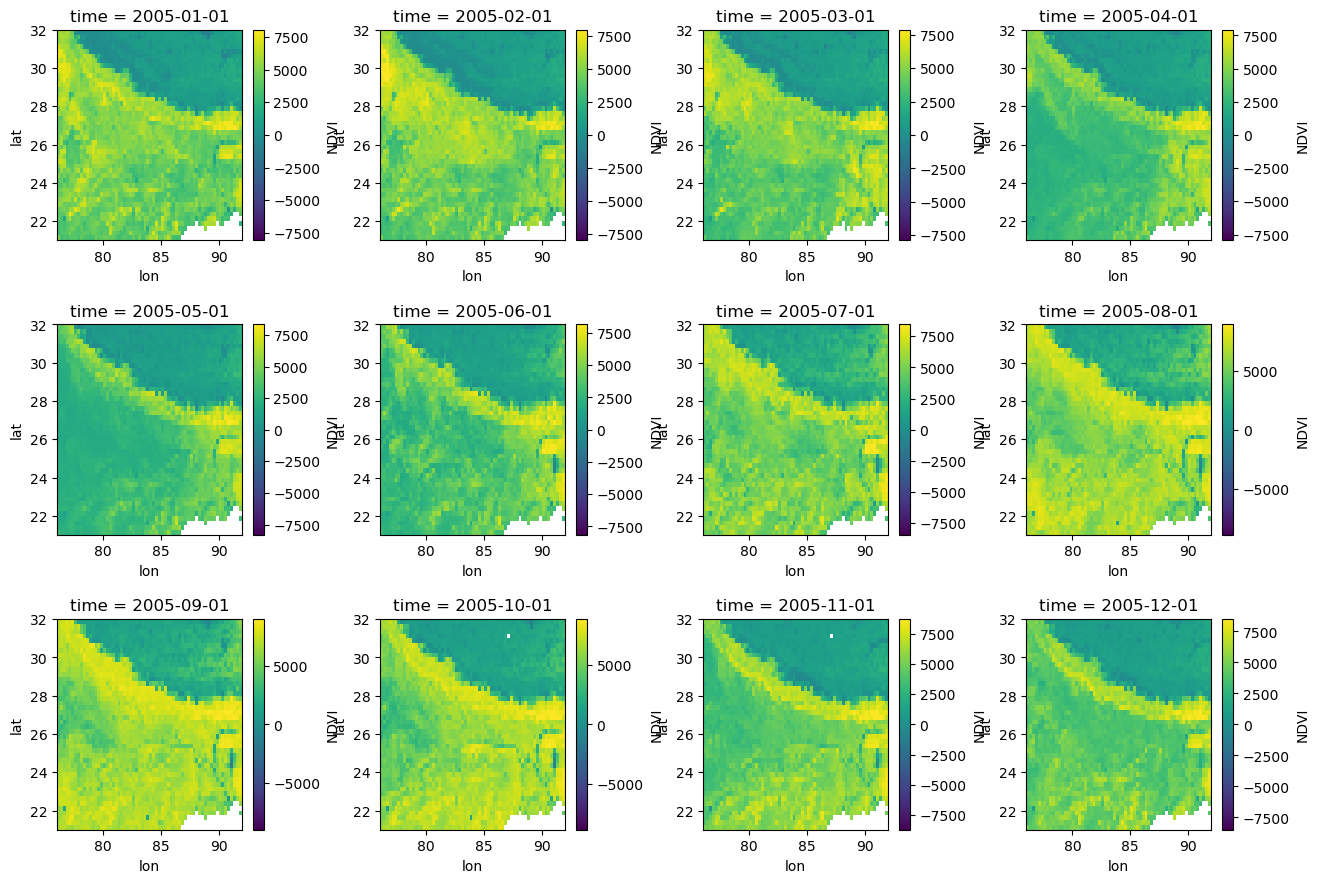

In [25]:
import matplotlib.pyplot as plt
lst = xr.open_dataset("D:/Masters/Thesis/Data/NDVI/NDVI_2003_2023.nc")
display(lst)
time = lst['time']
#display(time)
# Assuming lst is an xarray Dataset
lst = lst.transpose('time', 'lat', 'lon')  # Transpose if necessary
# Check if lat/lon are correctly labeled, otherwise rename them
lst = lst.rename({'lat': 'lat', 'lon': 'lon'})
for yr in range(2005,2006):
  filt_time = time.sel(time=time.dt.year==yr)
  display(filt_time)
  fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
  axes = axes.flatten()
  i=1
  # Plot each month
  for t in filt_time:
      monthly_data = lst.sel(time=t)
      #print(t)
      # Assuming you want to plot the first variable in the dataset
      monthly_data['NDVI'].plot(ax=axes[i-1],cmap = 'viridis')
      #axes[i].set_title(f'Month {i}')
      i+=1

  # Adjust layout
  plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, hspace=0.4, wspace=0.4)
  plt.savefig('D:\Masters\Thesis\Data\RFM/{yr}.png', bbox_inches='tight', dpi=300)
  plt.show()


## Count number of NAN

In [ ]:
nan_count = lst.isnull().sum()
print(f'Total NaN values in the dataset: \n{nan_count}')

# Export for RFM

In [ ]:
import xarray as xr
import pandas as pd

# Define the base date and the date to exclude
base_date = '2003-01-01'
date_to_exclude = '2003-06-01'

# Calculate the index of the date to exclude based on the base date
base_date = pd.to_datetime(base_date)
exclude_date = pd.to_datetime(date_to_exclude)

# Calculate the index of the date to exclude
months_difference = (exclude_date.year - base_date.year) * 12 + (exclude_date.month - base_date.month)
index_to_exclude = months_difference

# Open the dataset
what = 'NDVI'

# Create a subset excluding the calculated index
subset = xr.concat([data_array.isel(time=slice(1, index_to_exclude)), 
                   data_array.isel(time=slice(index_to_exclude + 1, 48))], dim='time')

index_to_exclude
print(len(subset['time'].values))

#subset = dataset.isel(time=slice(1,48))

In [ ]:
df = subset['NDVI'].to_dataframe()
df.to_csv('D:/Masters/Thesis/Data/RFM/'+ what +'.csv')